## Model Training

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
pd.set_option('display.max_columns', None)

In [142]:
df = pd.read_csv("E:/VS_Code/Projects/Customer_Churn/notebooks/data/processed_customer_churn_data.csv")

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
2660,3779-OSWCF,Female,38,Yes,0,Dillon Beach,94929,38.244580,-122.956268,8,71,No Offer,Yes,12,Yes,Yes,Cable,23.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Credit Card,93.20,6506.15,0.0,0,860.52,7366.67,Stayed,0,0.550476,0,4+ Years,9,True,4,False
1962,2842-BCQGE,Male,39,No,0,San Diego,92139,32.677716,-117.047666,0,43,Offer B,Yes,19,Yes,Yes,Fiber Optic,28.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,75.35,3161.40,0.0,0,845.38,4006.78,Stayed,1,0.116996,0,2-4 Years,2,False,0,False
853,1237-WIYYZ,Female,49,No,0,Los Angeles,90017,34.052842,-118.264495,0,18,Offer D,Yes,10,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,19.55,389.25,0.0,0,192.06,581.31,Stayed,1,0.085475,0,1-2 Years,0,False,0,False
5039,7083-YNSKY,Female,22,No,0,Lodi,95242,38.128087,-121.407800,0,15,Offer D,Yes,45,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,25.40,399.60,0.0,0,687.60,1087.20,Churned,1,0.085475,0,1-2 Years,1,False,0,True
3271,4674-HGNUA,Male,57,Yes,3,Petrolia,95558,40.274302,-124.210902,6,71,Offer A,Yes,31,Yes,Yes,Cable,27.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Credit Card,89.90,6457.15,0.0,0,2224.43,8681.58,Stayed,1,0.073832,0,4+ Years,9,True,4,False
1913,2789-CZANW,Female,49,Yes,1,Dublin,94568,37.713926,-121.928425,7,64,Offer B,Yes,21,Yes,Yes,Fiber Optic,23.0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,110.30,6997.30,0.0,0,1354.24,8351.54,Stayed,1,0.116996,0,4+ Years,8,True,3,False


In [143]:
df['customer_status'] = df['churned'].apply(lambda x : 1 if x == True else 0)

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
2230,3190-XFANI,Male,42,No,0,Happy Camp,96039,41.831901,-123.487478,0,49,No Offer,Yes,18,Yes,Yes,Fiber Optic,3.0,No,No,No,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,100.60,5069.65,0.0,0,929.53,5999.18,1,0,0.550476,0,4+ Years,6,True,1,True
5054,7107-UBYKY,Female,62,Yes,1,Sutter,95982,39.172777,-121.805845,5,35,Offer C,Yes,24,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,25.75,882.55,0.0,0,866.60,1749.15,0,1,0.058924,0,2-4 Years,1,False,0,False
6530,9272-LSVYH,Male,23,No,0,Courtland,95615,38.311609,-121.554034,0,10,No Offer,Yes,4,No,Yes,Fiber Optic,85.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,70.15,735.50,0.0,0,42.90,778.40,0,0,0.550476,0,0-1 Year,1,False,0,False
5061,7114-AEOZE,Female,53,No,0,Big Bar,96010,40.775272,-123.287414,0,60,Offer B,Yes,31,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,19.85,1128.10,0.0,0,1867.20,2995.30,0,1,0.116996,0,4+ Years,0,False,0,False
5640,7951-VRDVK,Female,26,No,0,Laguna Hills,92653,33.606899,-117.717854,0,36,No Offer,Yes,13,No,Yes,Cable,73.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,One Year,No,Bank Withdrawal,85.85,3003.55,0.0,0,500.40,3503.95,0,0,0.550476,0,2-4 Years,8,False,4,False
1579,2302-ANTDP,Female,76,Yes,0,Hat Creek,96040,40.789799,-121.474529,9,48,No Offer,Yes,43,Yes,Yes,Fiber Optic,5.0,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Month-to-Month,No,Bank Withdrawal,117.45,5438.90,0.0,0,2065.92,7504.82,1,0,0.550476,0,2-4 Years,8,True,4,True


In [144]:
df.shape

(7043, 44)

#### **MODEL with Hyperparameter Tuning**

In [66]:
!pip install category_encoders

In [68]:
!pip install catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 4.7/102.4 MB 22.4 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/102.4 MB 25.6 MB/s eta 0:00:04
   ------- -------------------------------- 19.4/102.4 MB 31.0 MB/s eta 0:00:03
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   -------------- ------------------------- 35.9/102.4 MB 21.0 MB/s eta 0:00:04
   --------------------- ------------------ 55.8/102.4 MB 29.0 MB/s eta 0:00:02
   ---------------------------- ----------- 73.1/102.4 MB 34.5 MB/s eta 0:00:01
   ------------------------------ --------- 78.6/102.4 MB 33.8 MB/s 

In [72]:
!pip install optuna

  Using cached sqlalchemy-2.0.41-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached sqlalchemy-2.0.41-cp313-cp313-win_amd64.whl (2.1 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------------- ---------------------- 3/7 [colorlog]
   -----------

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from category_encoders import CatBoostEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_validate

from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, 
    recall_score, f1_score, confusion_matrix, classification_report
)

In [135]:
import optuna
from optuna.visualization import plot_param_importances, plot_optimization_history
from optuna.exceptions import TrialPruned

import joblib

import sys
import os
from src.logger import logging

In [136]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
3525,4999-IEZLT,Male,45,No,0,Susanville,96130,40.559177,-120.612113,0,66,No Offer,No,0,No,Yes,Cable,15.0,No,No,No,Yes,No,No,No,Yes,One Year,No,Credit Card,29.45,1983.15,0.0,0,0.00,1983.15,0,0,0.550476,0,4+ Years,2,False,1,False
5256,7404-JLKQG,Female,21,No,0,Glennville,93226,35.735694,-118.738483,0,3,No Offer,Yes,48,No,Yes,Cable,42.0,No,No,Yes,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,57.55,161.45,0.0,0,144.90,306.35,0,0,0.550476,0,0-1 Year,3,False,1,False
337,0496-AHOOK,Male,61,Yes,0,Bangor,95914,39.396585,-121.380290,10,24,Offer C,Yes,32,No,Yes,Cable,30.0,Yes,No,No,Yes,Yes,Yes,Yes,Yes,One Year,No,Bank Withdrawal,74.40,1712.90,0.0,0,788.64,2501.54,0,1,0.058924,0,1-2 Years,6,False,2,False
2521,3605-JISKB,Male,67,Yes,0,Twentynine Palms,92278,34.457829,-116.139589,2,55,No Offer,Yes,9,Yes,Yes,Cable,23.0,Yes,Yes,No,No,No,No,No,Yes,One Year,No,Credit Card,60.00,3316.10,0.0,0,499.40,3815.50,0,0,0.550476,0,4+ Years,4,False,2,False
4511,6358-LYNGM,Male,26,No,0,Mariposa,95338,37.526791,-119.994370,0,1,Offer E,Yes,1,Yes,Yes,Fiber Optic,76.0,No,No,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,74.90,74.90,0.0,0,1.84,76.74,1,1,0.114298,0,0-1 Year,3,False,0,True
2752,3914-FDRHP,Male,25,No,0,Warner Springs,92086,33.323705,-116.626907,0,9,No Offer,Yes,46,No,Yes,Fiber Optic,59.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,86.25,770.50,0.0,0,417.06,1187.56,0,0,0.550476,0,0-1 Year,3,False,1,False


In [145]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [146]:
num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'customer_status',
 'has_offer',
 'offer_popularity',
 'has_extra_internet_charges',
 'engagement_score',
 'num_addon_services']

In [147]:
cat_cols

['customer_id',
 'gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [148]:
num_cols = [col for col in num_cols if col != 'customer_status']

num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'has_offer',
 'offer_popularity',
 'has_extra_internet_charges',
 'engagement_score',
 'num_addon_services']

In [149]:
cat_cols = [col for col in cat_cols if col != 'customer_id']

cat_cols

['gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [150]:
# Prepare data
X = df[num_cols + cat_cols]
y = df['customer_status']

In [151]:
X.shape, y.shape

((7043, 40), (7043,))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [153]:
# Batch 2: Fast Feature Selection
def select_features(X_train, y_train, num_cols, cat_cols):
    """Select top features using multiple models"""
    # Preprocessing
    X_processed = X_train.copy()
    
    for col in cat_cols:
        X_processed[col] = LabelEncoder().fit_transform(X_processed[col])
    
    # Initialize models
    models = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42)
    }
    
    # Feature importance storage
    feature_importances = pd.DataFrame(index=X_processed.columns)
    
    # Get feature importances from each model
    for name, model in models.items():
        model.fit(X_processed, y_train)
        
        # Store importances
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importances[name] = importances
    
    # Average importance across models
    feature_importances['Average'] = feature_importances.mean(axis=1)
    feature_importances = feature_importances.sort_values('Average', ascending=False)
    
    # Select top features
    top_features = feature_importances[feature_importances['Average'] > 
                                        feature_importances['Average'].quantile(0.5)].index.tolist()
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances['Average'], y=feature_importances.index, palette='viridis')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()
    
    return top_features, feature_importances

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


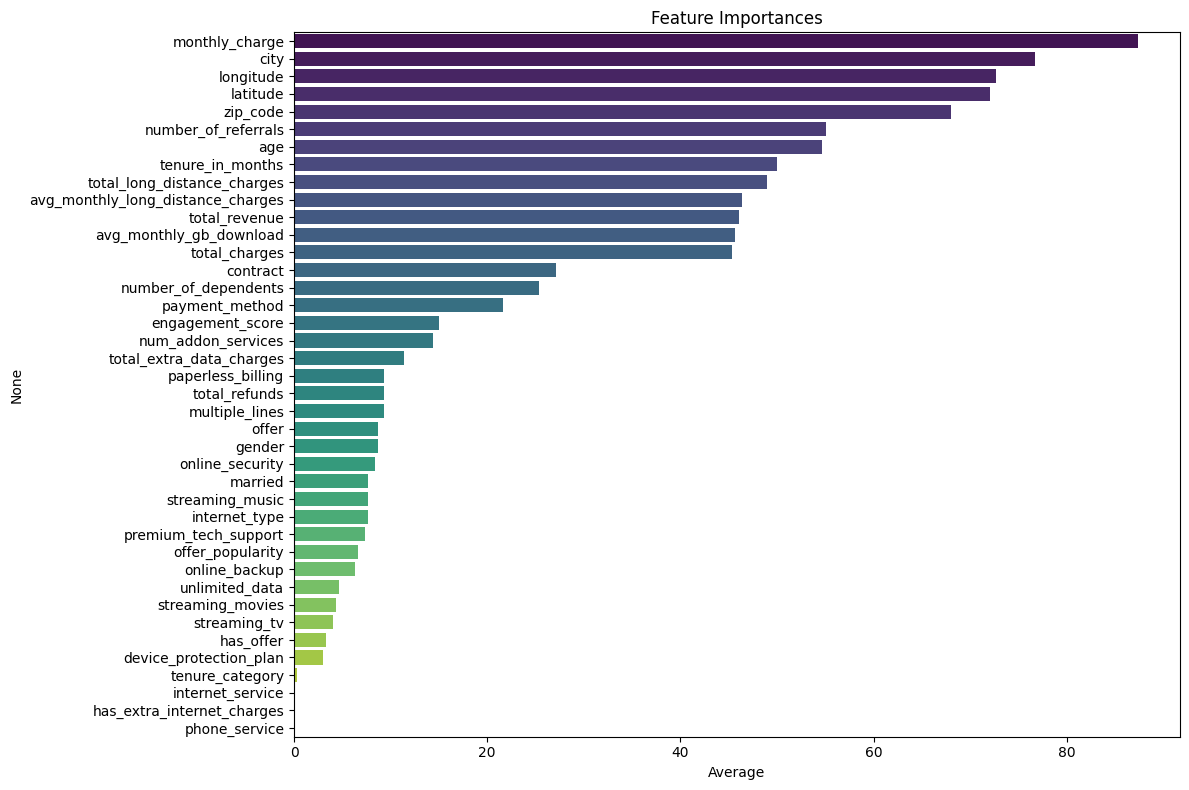

Selected 20 features: ['monthly_charge', 'city', 'longitude', 'latitude', 'zip_code', 'number_of_referrals', 'age', 'tenure_in_months', 'total_long_distance_charges', 'avg_monthly_long_distance_charges', 'total_revenue', 'avg_monthly_gb_download', 'total_charges', 'contract', 'number_of_dependents', 'payment_method', 'engagement_score', 'num_addon_services', 'total_extra_data_charges', 'paperless_billing']


In [154]:
# Run feature selection
top_features, feature_importances_df = select_features(X_train, y_train, num_cols, cat_cols)
print(f"Selected {len(top_features)} features: {top_features}")

In [31]:
# Filter datasets
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [32]:
sampleN = X_train[top_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
sampleC = X_train[top_features].select_dtypes(include=['object', 'category']).columns.tolist()

In [33]:
sampleN

['age',
 'zip_code',
 'tenure_in_months',
 'longitude',
 'latitude',
 'monthly_charge',
 'total_charges',
 'total_long_distance_charges',
 'avg_monthly_gb_download',
 'total_revenue',
 'number_of_dependents',
 'total_refunds',
 'num_addon_services',
 'avg_monthly_long_distance_charges',
 'engagement_score']

In [34]:
sampleC

['customer_status',
 'city',
 'customer_id',
 'paperless_billing',
 'contract',
 'tenure_category']

In [ ]:
def optimize_model(X_train, y_train, X_test, y_test, cat_cols, n_trials=50):
    """Optimize model with Optuna for multiclass classification"""
    # Prepare data storage
    study_results = []
    best_model = None
    best_score = -np.inf
    
    # Get unique classes to determine if binary or multiclass
    n_classes = len(np.unique(y_train))
    average_method = 'binary' if n_classes == 2 else 'weighted'
    
    # Define objective function
    def objective(trial):
        nonlocal best_model, best_score
        
        # Preprocessing choices
        encoder_type = trial.suggest_categorical('encoder', ['onehot', 'label', 'CatBoost', 'TargetEncoder'])
        scaler_type = trial.suggest_categorical('scaler', ['standard', 'minmax', 'none'])
        
        # Model selection
        model_name = trial.suggest_categorical('model', ['XGBoost', 'LightGBM', 'CatBoost', 'RandomForest'])
        
        # Preprocess data
        X_train_enc = X_train.copy()
        for col in cat_cols:
            if col in X_train_enc.columns:
                if encoder_type == 'onehot':
                    # Simple one-hot encoding without creating new dataframe
                    encoded = pd.get_dummies(X_train_enc[col], prefix=col)
                    X_train_enc = pd.concat([X_train_enc.drop(col, axis=1), encoded], axis=1)
                
                elif encoder_type == 'CatBoost':
                    CatBoostEncoder

                elif encoder_type == 'TargetEncoder':
                    TargetEncoder
                
                else:  # label encoding
                    X_train_enc[col] = LabelEncoder().fit_transform(X_train_enc[col])
        
        # Apply scaling
        if scaler_type != 'none':
            scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
            num_cols_in_data = [col for col in num_cols if col in X_train_enc.columns]
            X_train_enc[num_cols_in_data] = scaler.fit_transform(X_train_enc[num_cols_in_data])
        
        # Model hyperparameters
        if model_name == 'XGBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'objective': 'binary:logistic' if n_classes == 2 else 'multi:softprob',
                'eval_metric': 'auc' if n_classes == 2 else 'mlogloss'
            }
            model = XGBClassifier(**params, random_state=42)
            
        elif model_name == 'LightGBM':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'num_leaves': trial.suggest_int('num_leaves', 15, 127),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
                'objective': 'binary' if n_classes == 2 else 'multiclass',
                'metric': 'auc' if n_classes == 2 else 'multi_logloss'
            }
            model = lgb.LGBMClassifier(**params, random_state=42)
            
        elif model_name == 'CatBoost':
            params = {
                'iterations': trial.suggest_int('iterations', 100, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'depth': trial.suggest_int('depth', 4, 10),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'loss_function': 'Logloss' if n_classes == 2 else 'MultiClass'
            }
            model = CatBoostClassifier(**params, verbose=0, random_state=42)
            
        else:  # RandomForest
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
                'class_weight': 'balanced'
            }
            model = RandomForestClassifier(**params, random_state=42)
        
        # Train and evaluate with cross-validation
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        scores = []
        
        for train_idx, val_idx in cv.split(X_train_enc, y_train):
            X_fold_train, y_fold_train = X_train_enc.iloc[train_idx], y_train[train_idx]
            X_val, y_val = X_train_enc.iloc[val_idx], y_train[val_idx]
            
            model.fit(X_fold_train, y_fold_train)
            y_pred = model.predict(X_val)
            
            # Calculate metrics
            accuracy = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred, average=average_method)
            recall = recall_score(y_val, y_pred, average=average_method)
            f1 = f1_score(y_val, y_pred, average=average_method)
            
            # For AUC - handle binary vs multiclass
            if hasattr(model, 'predict_proba'):
                y_proba = model.predict_proba(X_val)
                if n_classes == 2:
                    auc = roc_auc_score(y_val, y_proba[:, 1])
                else:
                    auc = roc_auc_score(y_val, y_proba, multi_class='ovr')
            else:
                auc = roc_auc_score(y_val, y_pred)
            
            scores.append(auc)
        
        avg_auc = np.mean(scores)
        
        # Store results
        result = {
            'trial': trial.number,
            'model': model_name,
            'encoder': encoder_type,
            'scaler': scaler_type,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': avg_auc,
            'params': params
        }
        study_results.append(result)
        
        # Update best model
        if avg_auc > best_score:
            best_score = avg_auc
            best_model = model
        
        return avg_auc
    
    # Run optimization
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)
    
    # Prepare test set
    X_test_enc = X_test.copy()
    for col in cat_cols:
        if col in X_test_enc.columns:
            if study.best_params['encoder'] == 'onehot':
                # Align one-hot encoding with training
                for col_name in [c for c in X_train_enc.columns if col in c]:
                    if col_name not in X_test_enc:
                        X_test_enc[col_name] = 0
            else:
                X_test_enc[col] = LabelEncoder().fit_transform(X_test_enc[col])
    
    # Apply scaling
    if study.best_params['scaler'] != 'none':
        scaler = StandardScaler() if study.best_params['scaler'] == 'standard' else MinMaxScaler()
        num_cols_in_data = [col for col in num_cols if col in X_test_enc.columns]
        X_test_enc[num_cols_in_data] = scaler.fit_transform(X_test_enc[num_cols_in_data])
    
    # Final evaluation
    final_metrics = {}
    y_pred_test = best_model.predict(X_test_enc)
    
    final_metrics['accuracy'] = accuracy_score(y_test, y_pred_test)
    final_metrics['precision'] = precision_score(y_test, y_pred_test, average=average_method)
    final_metrics['recall'] = recall_score(y_test, y_pred_test, average=average_method)
    final_metrics['f1'] = f1_score(y_test, y_pred_test, average=average_method)
    
    if hasattr(best_model, 'predict_proba'):
        y_proba_test = best_model.predict_proba(X_test_enc)
        if n_classes == 2:
            final_metrics['auc'] = roc_auc_score(y_test, y_proba_test[:, 1])
        else:
            final_metrics['auc'] = roc_auc_score(y_test, y_proba_test, multi_class='ovr')
    else:
        final_metrics['auc'] = roc_auc_score(y_test, y_pred_test)
    
    return study, best_model, final_metrics, study_results

In [36]:
# Run optimization
study, best_model, final_metrics, all_results = optimize_model(
    X_train_sel, y_train, X_test_sel, y_test, 
    [col for col in cat_cols if col in top_features],
    n_trials=30
)

[I 2025-07-19 13:58:19,805] A new study created in memory with name: no-name-7e7794d4-d5fc-4cdb-9473-f4bf71dcac5f
[I 2025-07-19 13:58:35,754] Trial 0 finished with value: 0.9999993347884963 and parameters: {'encoder': 'onehot', 'scaler': 'standard', 'model': 'RandomForest', 'n_estimators': 334, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9999993347884963.
[I 2025-07-19 13:58:40,160] Trial 1 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'standard', 'model': 'RandomForest', 'n_estimators': 461, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 1.0.
[I 2025-07-19 13:59:35,507] Trial 2 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'XGBoost', 'n_estimators': 462, 'learning_rate': 0.017589732468835585, 'max_depth': 3, 'subsample': 0.6610517270205606, 'colsample_bytree': 0.8379670479953595}. Best is trial 1 with value: 1.0.
[I 2

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2220
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 54
[LightGBM] [Info] Start training from score -1.326359
[LightGBM] [Info] Start training from score -2.742172
[LightGBM] [Info] Start training from score -0.400287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-07-19 13:59:43,557] Trial 5 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'standard', 'model': 'LightGBM', 'n_estimators': 420, 'learning_rate': 0.015634113235126243, 'num_leaves': 34, 'max_depth': 4, 'min_child_samples': 13}. Best is trial 1 with value: 1.0.
[I 2025-07-19 13:59:44,526] Trial 6 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'iterations': 158, 'learning_rate': 0.06185239814069979, 'depth': 4, 'l2_leaf_reg': 2.8610125283369916}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:00:32,836] Trial 7 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'XGBoost', 'n_estimators': 428, 'learning_rate': 0.07236696047893681, 'max_depth': 8, 'subsample': 0.9292909427492466, 'colsample_bytree': 0.6176861722492245}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:00:38,348] Trial 8 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': '

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2172
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 34
[LightGBM] [Info] Start training from score -1.326359
[LightGBM] [Info] Start training from score -2.742172
[LightGBM] [Info] Start training from score -0.400287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-07-19 14:01:17,799] Trial 11 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'LightGBM', 'n_estimators': 499, 'learning_rate': 0.035110050373178076, 'num_leaves': 126, 'max_depth': 8, 'min_child_samples': 30}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2025-07-19 14:01:46,737] Trial 12 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'XGBoost', 'n_estimators': 200, 'learning_rate': 0.031543776331935634, 'max_depth': 3, 'subsample': 0.6158291361497275, 'colsample_bytree': 0.750397148746635}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:01:51,497] Trial 13 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'RandomForest', 'n_estimators': 485, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:01:56,903] Trial 14 finished with value: 0.9980066046175732 and parameters: {'encoder': 'onehot', 'scaler': 'none', 'model': 'RandomForest', 'n_estimators': 251, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:01:57,615] Trial 15 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'standard', 'model': 'XGBoost

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2656
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 21
[LightGBM] [Info] Start training from score -1.326359
[LightGBM] [Info] Start training from score -2.742172
[LightGBM] [Info] Start training from score -0.400287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 14:01:58,470] Trial 16 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'LightGBM', 'n_estimators': 464, 'learning_rate': 0.010384065703437442, 'num_leaves': 103, 'max_depth': 3, 'min_child_samples': 6}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:06:56,926] Trial 17 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'standard', 'model': 'CatBoost', 'iterations': 492, 'learning_rate': 0.025562568678367276, 'depth': 10, 'l2_leaf_reg': 9.967513670839057}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:08:39,571] Trial 18 finished with value: 1.0 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'XGBoost', 'n_estimators': 376, 'learning_rate': 0.10081426052963159, 'max_depth': 6, 'subsample': 0.7539828838261233, 'colsample_bytree': 0.8774211463702097}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:08:43,936] Trial 19 finished with value: 1.0 and parameters: {'encoder': 'label', 'sca

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2656
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 21
[LightGBM] [Info] Start training from score -1.326359
[LightGBM] [Info] Start training from score -2.742172
[LightGBM] [Info] Start training from score -0.400287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 14:10:39,995] Trial 26 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'LightGBM', 'n_estimators': 460, 'learning_rate': 0.26061718633288283, 'num_leaves': 15, 'max_depth': 4, 'min_child_samples': 30}. Best is trial 1 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2025-07-19 14:10:41,724] Trial 27 finished with value: 1.0 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'CatBoost', 'iterations': 418, 'learning_rate': 0.022260227521432866, 'depth': 4, 'l2_leaf_reg': 4.903757637927502}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:10:45,518] Trial 28 finished with value: 0.9957519562226533 and parameters: {'encoder': 'onehot', 'scaler': 'none', 'model': 'RandomForest', 'n_estimators': 413, 'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 1.0.
[I 2025-07-19 14:10:50,463] Trial 29 finished with value: 0.9962954059892808 and parameters: {'encoder': 'onehot', 'scaler': 'standard', 'model': 'RandomForest', 'n_estimators': 362, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 1.0.


In [37]:
# Batch 4: Results Analysis
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)
results_df.sample(6)

,trial,model,encoder,scaler,accuracy,precision,recall,f1,auc,params
24,24,RandomForest,label,minmax,0.998935,0.998939,0.998935,0.998932,1.000000,"{'n_estimators': 369, 'max_depth': 12, 'min_sa..."
19,19,RandomForest,label,none,0.998935,0.998939,0.998935,0.998932,1.000000,"{'n_estimators': 269, 'max_depth': 12, 'min_sa..."
16,16,LightGBM,label,minmax,1.000000,1.000000,1.000000,1.000000,1.000000,"{'n_estimators': 464, 'learning_rate': 0.01038..."
2,2,XGBoost,onehot,minmax,1.000000,1.000000,1.000000,1.000000,1.000000,"{'n_estimators': 462, 'learning_rate': 0.01758..."
28,28,RandomForest,onehot,none,0.952609,0.967777,0.952609,0.956352,0.995752,"{'n_estimators': 413, 'max_depth': 26, 'min_sa..."
25,25,RandomForest,label,minmax,0.998935,0.998939,0.998935,0.998932,1.000000,"{'n_estimators': 422, 'max_depth': 18, 'min_sa..."


In [38]:
# Show best parameters
print("\nBest Parameters:")
print(f"Model: {study.best_params['model']}")
print(f"Encoder: {study.best_params['encoder']}")
print(f"Scaler: {study.best_params['scaler']}")
print("Hyperparameters:")
for k, v in study.best_params.items():
    if k not in ['model', 'encoder', 'scaler']:
        print(f"{k}: {v}")


Best Parameters:
Model: RandomForest
Encoder: label
Scaler: standard
Hyperparameters:
n_estimators: 461
max_depth: 12
min_samples_split: 2
min_samples_leaf: 4


In [39]:
# Show final metrics
print("\nTest Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Test Metrics:
accuracy: 0.9993
precision: 0.9993
recall: 0.9993
f1: 0.9993
auc: 1.0000


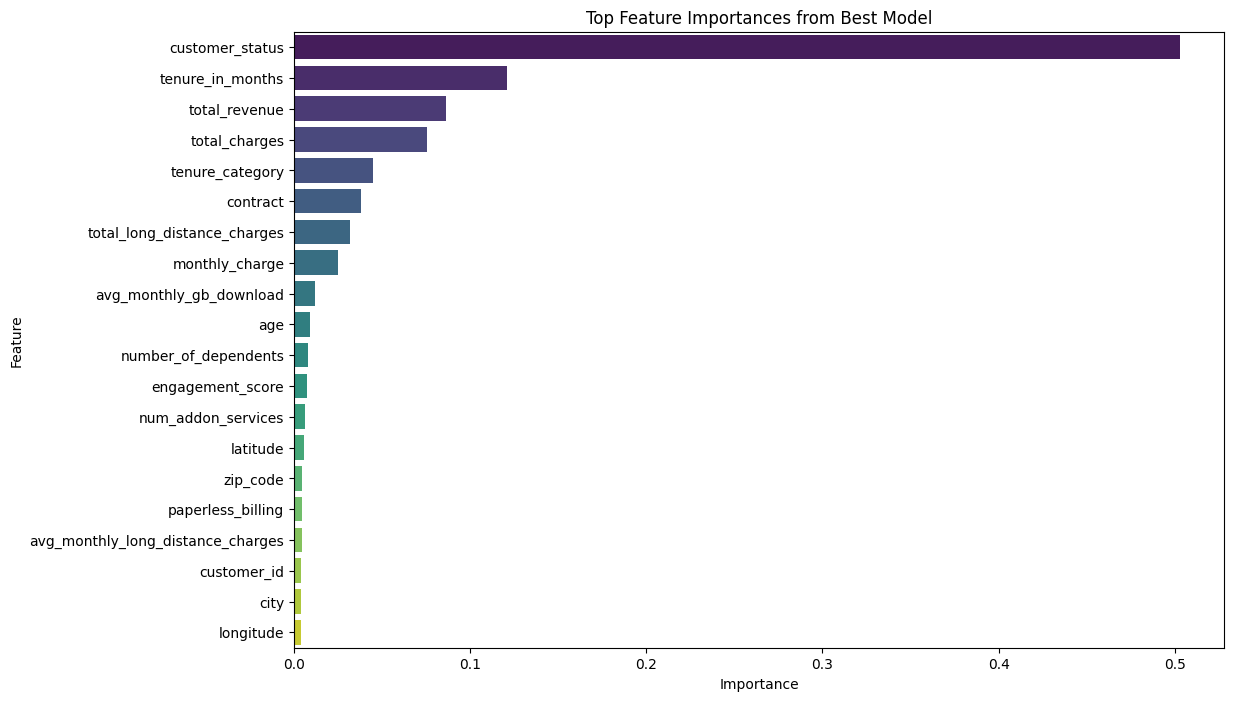

Top features from best model: ['customer_status', 'tenure_in_months', 'total_revenue', 'total_charges', 'tenure_category', 'contract', 'total_long_distance_charges', 'monthly_charge', 'avg_monthly_gb_download', 'age', 'number_of_dependents', 'engagement_score', 'num_addon_services', 'latitude', 'zip_code', 'paperless_billing', 'avg_monthly_long_distance_charges', 'customer_id', 'city', 'longitude']


In [40]:
# Plot feature importances from best model
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    importances = best_model.feature_importances_
    features = X_train_sel.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
    plt.title('Top Feature Importances from Best Model')
    plt.show()
    
    # Store top features
    top_features_model = importance_df.head(20)['Feature'].tolist()
    print("Top features from best model:", top_features_model)

In [57]:
top_features_model

['customer_status',
 'tenure_in_months',
 'total_revenue',
 'total_charges',
 'tenure_category',
 'contract',
 'total_long_distance_charges',
 'monthly_charge',
 'avg_monthly_gb_download',
 'age',
 'number_of_dependents',
 'engagement_score',
 'num_addon_services',
 'latitude',
 'zip_code',
 'paperless_billing',
 'avg_monthly_long_distance_charges',
 'customer_id',
 'city',
 'longitude']

In [58]:
sampleN = X_train[top_features_model].select_dtypes(include=['int64', 'float64']).columns.tolist()
sampleC = X_train[top_features_model].select_dtypes(include=['object', 'category']).columns.tolist()

In [61]:
sampleN

['tenure_in_months',
 'total_revenue',
 'total_charges',
 'total_long_distance_charges',
 'monthly_charge',
 'avg_monthly_gb_download',
 'age',
 'number_of_dependents',
 'engagement_score',
 'num_addon_services',
 'latitude',
 'zip_code',
 'avg_monthly_long_distance_charges',
 'longitude']

In [59]:
sampleC

['customer_status',
 'tenure_category',
 'contract',
 'paperless_billing',
 'customer_id',
 'city']

In [51]:
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_param_importances

<Figure size 1000x600 with 0 Axes>

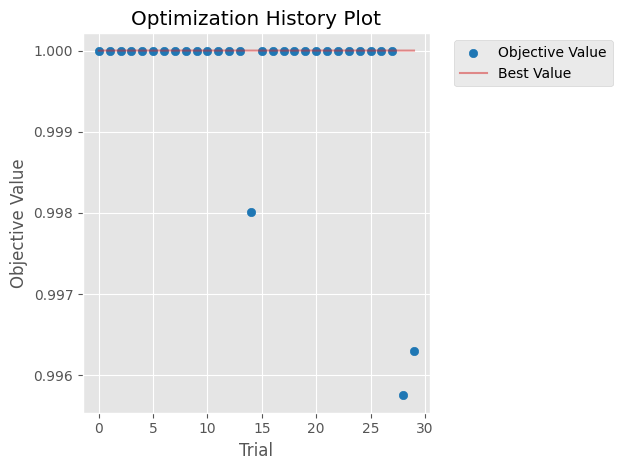

In [52]:
# Plot optimization history
plt.figure(figsize=(10, 6))
plot_optimization_history(study)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

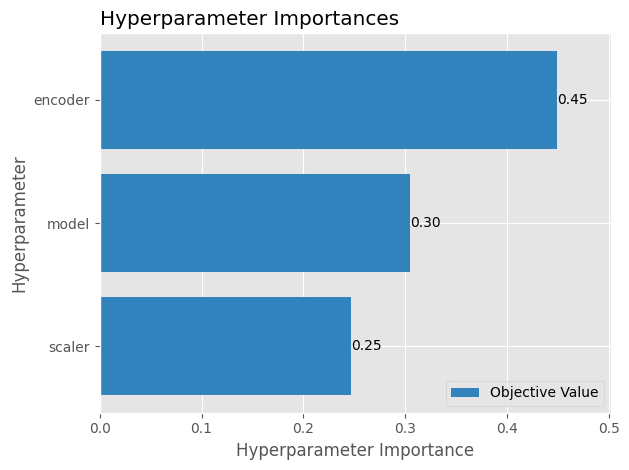

In [53]:
# Plot parameter importance
plt.figure(figsize=(10, 6))
plot_param_importances(study)
plt.tight_layout()
plt.show()

In [63]:
df.drop(columns = ['churned'], axis = 1, inplace = True)

In [66]:
df[top_features_model]

,customer_status,tenure_in_months,total_revenue,total_charges,tenure_category,contract,total_long_distance_charges,monthly_charge,avg_monthly_gb_download,age,number_of_dependents,engagement_score,num_addon_services,latitude,zip_code,paperless_billing,avg_monthly_long_distance_charges,customer_id,city,longitude
0,Stayed,9,974.81,593.30,0-1 Year,One Year,381.51,65.60,16.0,37,0,4,2,34.827662,93225,Yes,42,0002-ORFBO,Frazier Park,-118.999073
1,Stayed,9,610.28,542.40,0-1 Year,Month-to-Month,96.21,-4.00,10.0,46,0,4,0,34.162515,91206,No,10,0003-MKNFE,Glendale,-118.203869
2,Churned,4,415.45,280.85,0-1 Year,Month-to-Month,134.60,73.90,30.0,50,0,2,1,33.645672,92627,Yes,33,0004-TLHLJ,Costa Mesa,-117.922613
3,Churned,13,1599.51,1237.85,1-2 Years,Month-to-Month,361.66,98.00,4.0,78,0,5,2,38.014457,94553,Yes,27,0011-IGKFF,Martinez,-122.115432
4,Churned,3,289.54,267.40,0-1 Year,Month-to-Month,22.14,83.90,11.0,75,0,3,1,34.227846,93010,Yes,7,0013-EXCHZ,Camarillo,-119.079903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Stayed,13,1349.74,742.90,1-2 Years,One Year,606.84,55.15,59.0,20,0,4,2,32.759327,91941,No,46,9987-LUTYD,La Mesa,-116.997260
7039,Churned,22,2230.10,1873.70,1-2 Years,Month-to-Month,356.40,85.10,17.0,40,0,4,0,37.734971,95367,Yes,16,9992-RRAMN,Riverbank,-120.954271
7040,Joined,2,129.99,92.75,0-1 Year,Month-to-Month,37.24,50.30,51.0,22,0,2,1,39.108252,95432,Yes,18,9992-UJOEL,Elk,-123.645121
7041,Stayed,67,4769.69,4627.65,4+ Years,Two Year,142.04,67.85,58.0,21,0,6,3,33.001813,92075,No,2,9993-LHIEB,Solana Beach,-117.263628


In [67]:
df = df[top_features_model]

In [ ]:
df.drop(columns = ['churned'], axis = 1, inplace = True)

In [ ]:
df.to_csv('data/best_features_customer_churn_data.csv', index=False)

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("data/best_features_customer_churn_data.csv")
df.head()

,customer_status,tenure_in_months,total_revenue,total_charges,tenure_category,contract,total_long_distance_charges,monthly_charge,avg_monthly_gb_download,age,number_of_dependents,engagement_score,num_addon_services,latitude,zip_code,paperless_billing,avg_monthly_long_distance_charges,customer_id,city,longitude
0,2,9,974.81,593.30,0-1 Year,One Year,381.51,65.6,16.0,37,0,4,2,34.827662,93225,Yes,42,0002-ORFBO,Frazier Park,-118.999073
1,2,9,610.28,542.40,0-1 Year,Month-to-Month,96.21,-4.0,10.0,46,0,4,0,34.162515,91206,No,10,0003-MKNFE,Glendale,-118.203869
2,0,4,415.45,280.85,0-1 Year,Month-to-Month,134.60,73.9,30.0,50,0,2,1,33.645672,92627,Yes,33,0004-TLHLJ,Costa Mesa,-117.922613
3,0,13,1599.51,1237.85,1-2 Years,Month-to-Month,361.66,98.0,4.0,78,0,5,2,38.014457,94553,Yes,27,0011-IGKFF,Martinez,-122.115432
4,0,3,289.54,267.40,0-1 Year,Month-to-Month,22.14,83.9,11.0,75,0,3,1,34.227846,93010,Yes,7,0013-EXCHZ,Camarillo,-119.079903


In [9]:
le = LabelEncoder()

df['customer_status'] = le.fit_transform(df['customer_status'])

df.sample(6)

,customer_status,tenure_in_months,total_revenue,total_charges,tenure_category,contract,total_long_distance_charges,monthly_charge,avg_monthly_gb_download,age,number_of_dependents,engagement_score,num_addon_services,latitude,zip_code,paperless_billing,avg_monthly_long_distance_charges,customer_id,city,longitude
1801,2,62,1969.17,1416.75,4+ Years,Two Year,552.42,23.65,0.0,49,0,1,0,37.945288,94801,No,8,2632-TACXW,Richmond,-122.383941
2458,2,34,1676.33,980.35,2-4 Years,Two Year,695.98,26.10,0.0,54,0,1,0,34.361387,92345,No,20,3521-HTQTV,Hesperia,-117.337509
1389,2,55,4462.70,2838.55,4+ Years,One Year,1624.15,51.65,29.0,75,0,2,0,33.036790,92281,No,29,2055-SIFSS,Westmorland,-115.605030
4887,2,18,1419.18,1199.40,1-2 Years,Month-to-Month,219.78,69.50,8.0,56,0,5,2,38.567594,95819,No,12,6890-PFRQX,Sacramento,-121.437507
3496,0,4,588.48,355.20,0-1 Year,Month-to-Month,193.28,88.95,51.0,30,0,5,1,33.975332,90302,Yes,48,4951-UKAAQ,Inglewood,-118.355252
5574,0,1,23.24,20.15,0-1 Year,Month-to-Month,3.09,20.15,0.0,55,1,0,0,34.076259,90004,Yes,3,7853-GVUDZ,Los Angeles,-118.310715


In [7]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df.to_csv('data/best_features_customer_churn_data.csv', index=False)

In [9]:
Num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
Cat = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [10]:
Num

['customer_status',
 'tenure_in_months',
 'total_revenue',
 'total_charges',
 'total_long_distance_charges',
 'monthly_charge',
 'avg_monthly_gb_download',
 'age',
 'number_of_dependents',
 'engagement_score',
 'num_addon_services',
 'latitude',
 'zip_code',
 'avg_monthly_long_distance_charges',
 'longitude']

In [5]:
Cat

['tenure_category', 'contract', 'paperless_billing', 'customer_id', 'city']